### AWS DeepComposer uses a GAN

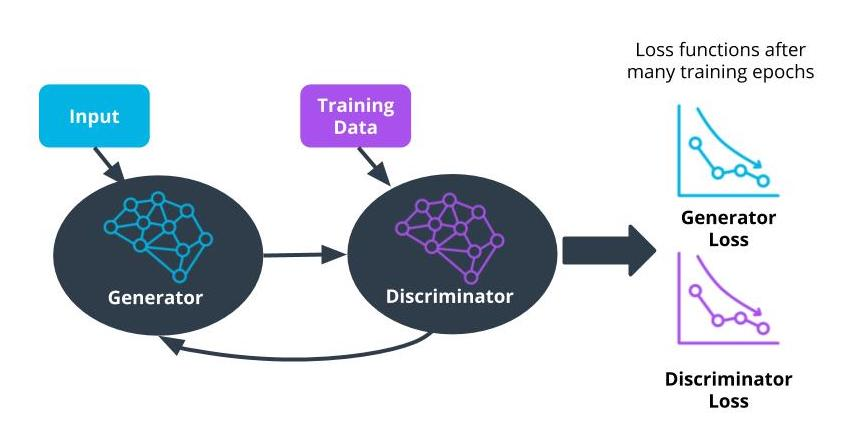

In [2]:
from IPython.display import Image
Image(filename='aws-mle-gan-model.jpg')

Each iteration of the training cycle is called an epoch. The model is trained for thousands of epochs.

**Loss Functions**
In machine learning, the `goal of iterating and completing epochs is to improve the output or prediction of the model`. Any output that deviates from the ground truth is referred to as an error. The measure of an error, given a set of weights, is called a loss function.` Weights represent how important an associated feature is to determining the accuracy of a prediction, and loss functions are used to update the weights after every iteration`. Ideally, as the weights update, the model improves making less and less errors. Convergence happens once the loss functions stabilize.

We use loss functions to measure how closely the output from the GAN models match the desired outcome. Or, in the case of DeepComposer, how well does DeepComposer's output music match the training music. Once the loss functions from the Generator and Discriminator converges, this indicates the GAN model is no longer learning, and we can stop its training.

We also measures the quality of the music generated by DeepComposer via additional quantitative metrics, such as drum pattern and polyphonic rate.

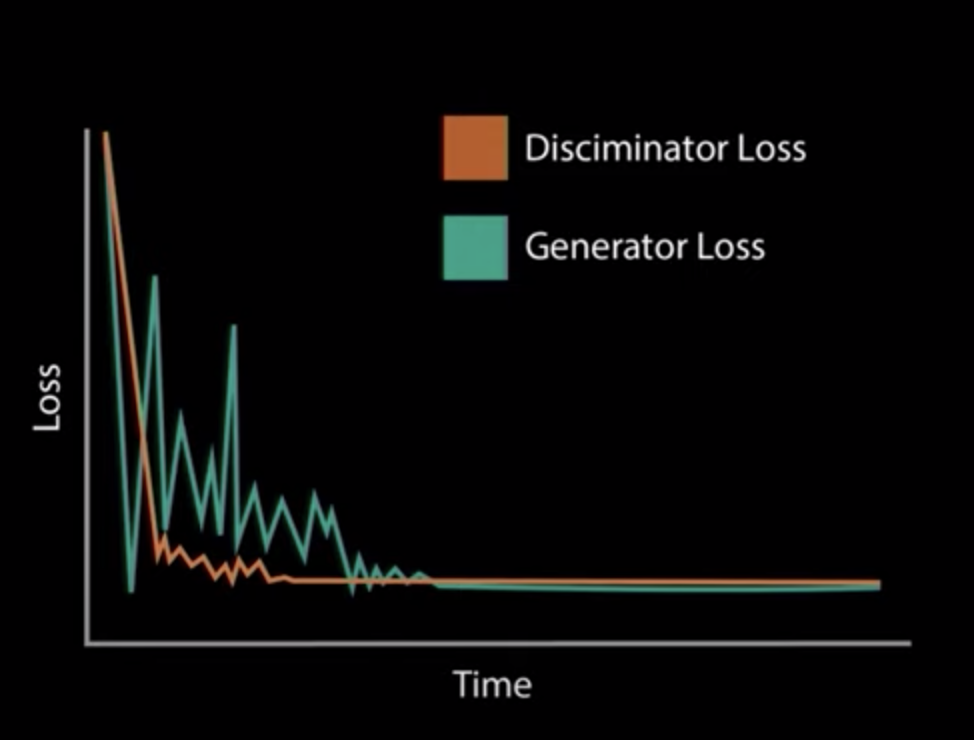

In [4]:
Image(filename='loss_functions.png')

`GAN loss functions have many fluctuations early on due to the “adversarial” nature of the generator and discriminator.`

Over time, the loss functions stabilizes to a point, we call this convergence. This convergence can be zero, but doesn’t have to be.

## AWS DeepComposer Under The Hood

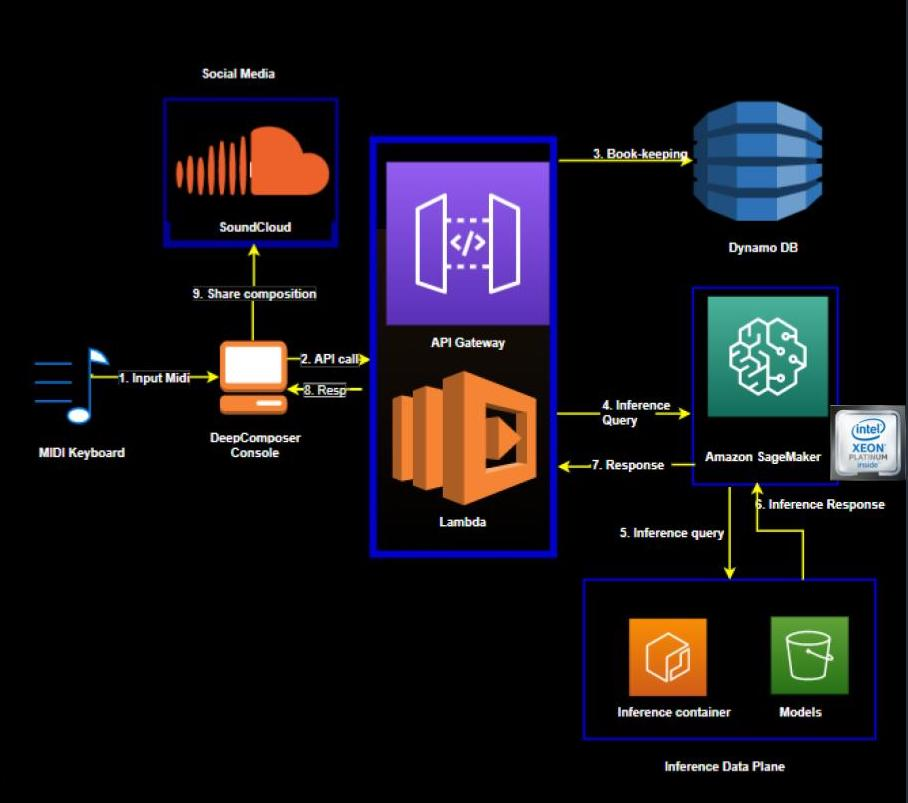

In [6]:
Image(filename='aws-mle-under-hood-v2.jpg')

### How It Works
1. Input melody captured on the AWS DeepComposer console
2. Console makes a backend call to AWS DeepComposer APIs that triggers an execution Lambda.
3. Book-keeping is recorded in Dynamo DB.
4. The execution Lambda performs an inference query to SageMaker which hosts the model and the training inference container.
5. The query is run on the Generative AI model.
6. The model generates a composition.
7. The generated composition is returned.
8. The user can hear the composition in the console.
9. The user can share the composition to SoundCloud.

# Training Architecture


### How to measure the quality of the music we’re generating:

1. We can monitor the loss function to make sure the model is converging
2. We can check the similarity index to see how close is the model to mimicking the style of the data. When the graph of the similarity index smoothes out and becomes less spikey, we can be confident that the model is converging
3. We can listen to the music created by the generated model to see if it's doing a good job. The musical quality of the model should improve as the number of training epochs increases.

## Training architecture
1. User launch a training job from the AWS DeepComposer console by selecting hyperparameters and data set filtering tags
2. The backend consists of an API Layer (API gateway and lambda) write request to DynamoDB
3. Triggers a lambda function that starts the training workflow
4. It then uses AWS Step Funcitons to launch the training job on Amazon SageMaker
5. Status is continually monitored and updated to DynamoDB
6. The console continues to poll the backend for the status of the training job and update the results live so users can see how the model is learning

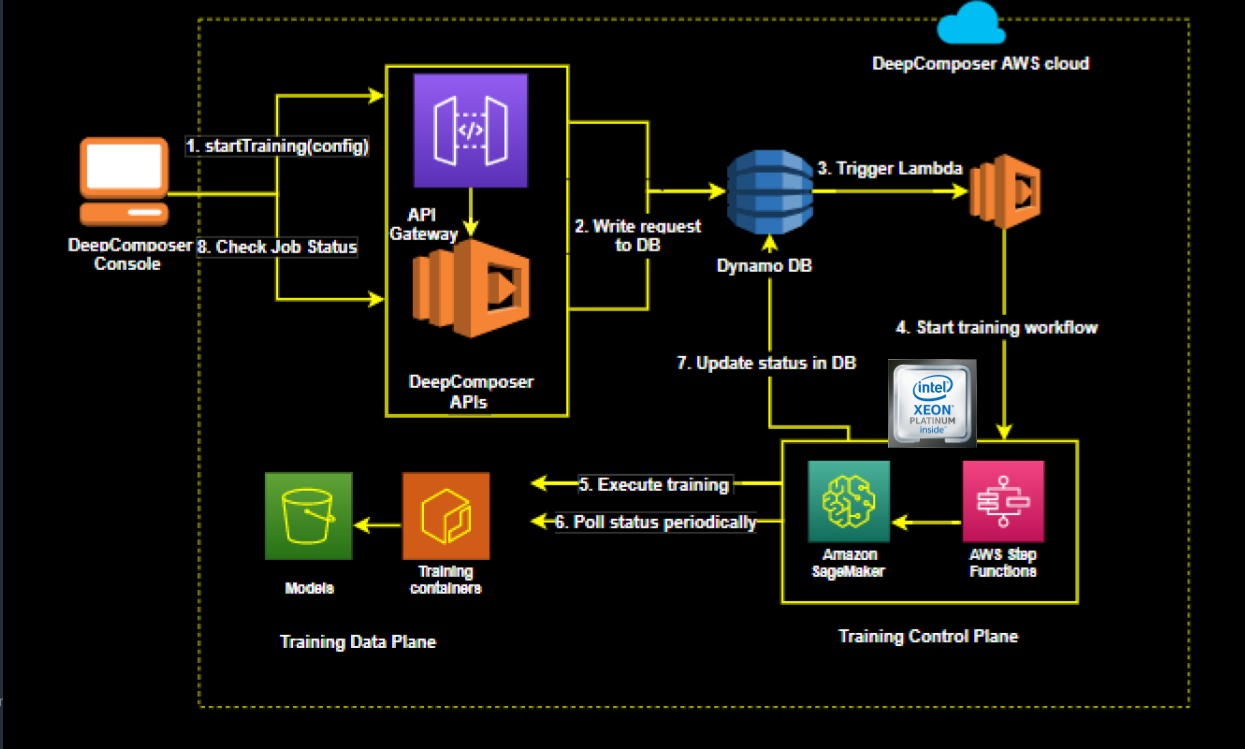

In [7]:
Image(filename='aws-mle-train-arch.png')

# Challenges with GANs
1. Clean datasets are hard to obtain
2. Not all melodies sound good in all genres
3. Convergence in GAN is tricky – it can be fleeting rather than being a stable state
4. Complexity in defining meaningful quantitive metrics to measure the quality of music created